# Mobile price prediction - Linear Regression
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Context:
GSMArena Phones Dataset is a labeled dataset extracted from GSMArena, one of the most popular online provider of phone information, and holds a large collection of phone specification.

### Data Set - 

Domain: Telecom

Data: https://www.kaggle.com/arwinneil/gsmarena-phone-dataset

#### Features

1. brand
2. model
3. network_technology
4. 2G_bands
5. 3G_bands
6. 4G_bands
7. network_speed
8. GPRS
9. EDGE
10. announced
11. status
12. dimentions
13. weight_g
14. weight_oz
15. SIM
16. display_type
17. display_resolution
18. display_size
19. OS
20. CPU
21. Chipset
22. GPU
23. memory_card
24. internal_memory
25. RAM
26. primary_camera
27. secondary_camera
28. loud_speaker
29. audio_jack
30. WLAN
31. bluetooth
32. GPS
33. NFC
34. radio
35. USB
36. sensors
37. battery
38. colors
39. approx_price_EUR
40. img_url

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Objective - 

To predict mobile phone price belonging to a specific brand depending on the available features


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Steps to perform:

#### 1. Import Libraries
#### 2. Import Data set and exploration
#### 3. Data Cleansing
#### 4. Data Preparation
#### 5. Data Validation
#### 6. EDA
#### 7. Data Split - Train : Test
#### 8. Supervised Learning modeling: Linear Regression
#### 9. Model Testing: Linear Regression
#### 10. Future data prediction

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')           # Ignore warnings

%matplotlib inline

import pandas as pd                          # For converting .csv file into Dataframe
import numpy as np                           # For Numeric operations 
import seaborn as sns                        # For Data Visualization
import matplotlib.pyplot as plt              # For plotting Data
from sklearn.linear_model import LinearRegression

### 2. Reading Dataset and Exploration ( report shape of the dataset)

In [2]:
DF_mobile = pd.read_csv('mobile_price.csv')  # Importing .csv file and converting it into pandas Dataframe

#### Check a few sample of the dataframe and get familiar with the data

In [3]:
pd.set_option('display.max_columns',None)    # For Displaying all columns in Dataframe
pd.set_option('display.max_rows',None)       # For Displaying all rows in Dataframe
DF_mobile.head()                             # Selecting top 5 rows of the Dataframe

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
0,Acer,Iconia Talk S,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 1900 / 2100,LTE band 1(2100)/ 3(1800)/ 7(2600)/ 8(900)/ 20...,HSPA 42.2/11.5 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 October,191.7 x 101 x 9.4 mm (7.55 x 3.98 x 0.37 in),260,9.17,Dual SIM (Micro-SIM/Nano-SIM),IPS LCD capacitive touchscreen 16M colors,7.0 inches (~69.8% screen-to-body ratio),720 x 1280 pixels (~210 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8735,Mali-T720MP2,microSD up to 128 GB (dedicated slot),16/32 GB,2 GB RAM,13 MP/ autofocus,2 MP/ 720p,Yes,Yes,Wi-Fi 802.11 a/b/g/n/ Wi-Fi Direct/ hotspot,4.0/ A2DP,Yes with A-GPS GLONASS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Non-removable Li-Ion 3400 mAh battery (12.92 Wh),Black,170,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
1,Acer,Liquid Z6 Plus,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2016 August,Available. Released 2016 December,153.8 x 75.6 x 8.5 mm (6.06 x 2.98 x 0.33 in),169,5.96,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM/...,IPS LCD capacitive touchscreen 16M colors,5.5 inches (~71.7% screen-to-body ratio),1080 x 1920 pixels (~401 ppi pixel density),Android 6.0 (Marshmallow),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP3,microSD up to 256 GB (uses SIM 2 slot),32 GB,3 GB RAM,13 MP/ autofocus/ LED flash,5 MP,Yes,Yes,Wi-Fi 802.11 b/g/n/ Wi-Fi Direct/ hotspot,4.0/ A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Fingerprint (front-mounted)/ accelerometer/ pr...,Removable Li-Po 4080 mAh battery,Black/ White,250,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
2,Acer,Liquid Z6,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA,LTE,HSPA LTE,Yes,Yes,2016 August,Available. Released 2016 December,-,NaN,NaN,Single SIM (Micro-SIM) or Dual SIM (Micro-SIM/...,IPS LCD capacitive touchscreen 16M colors,5.0 inches,720 x 1280 pixels (~294 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.25 GHz Cortex-A53,Mediatek MT6737,Mali-T720MP2,microSD up to 256 GB,8 GB,1 GB RAM,8 MP/ autofocus/ LED flash,2 MP,Yes,Yes,Yes,Yes,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Removable Li-Ion 2000 mAh battery,Black/ White,120,http://cdn2.gsmarena.com/vv/bigpic/acer-liquid...
3,Acer,Iconia Tab 10 A3-A40,No cellular connectivity,NA,NaN,NaN,NaN,No,No,2016 April,Available. Released 2016 June,259 x 167 x 8.9 mm (10.20 x 6.57 x 0.35 in),NaN,NaN,No,IPS LCD capacitive touchscreen 16M colors,10.1 inches (~68.4% screen-to-body ratio),1920 x 1200 pixels (~224 ppi pixel density),Android 6.0 (Marshmallow),Quad-core 1.3 GHz Cortex-A53,Mediatek MT8163A,Mali-T720 MP2,microSD up to 256 GB (dedicated slot),16/32/64 GB,2 GB RAM,5 MP,2 MP,Yes with stereo speakers (4 speakers),Yes,Wi-Fi 802.11 a/b/g/n/ac/ dual-band/ hotspot,Yes,NaN,NaN,No,microUSB 2.0,Accelerometer,Non-removable Li-Ion battery,Black,230,http://cdn2.gsmarena.com/vv/bigpic/acer-iconia...
4,Acer,Liquid X2,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 1900 / 2100 - Europe/ Taiwan,LTE 800 / 1800 / 2100 / 2600 - Europe,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 April,Available. Released 2016 February,153.3 x 78.8 x 8.5 mm (6.04 x 3.10 x 0.33 in),166,5.86,Triple SIM (Micro-SIM),IPS LCD capacitive touchscreen 16M colors,5.5 inches (~69.0% screen-to-body ratio),720 x 1280 pixels (~267 ppi pixel density),Android 5.1 (Lollipop),Octa-core 1.3 GHz Cortex-A53,Mediatek MT6753,Mali-T720MP4,microSD up to 32 GB (dedicated slot),32 GB,3 GB RAM,13 MP/ f/1.8/ autofocu

#### Check info of the dataframe and comment on datatype of various features

In [4]:
DF_mobile.shape      # Dataset consist of 8628 rows and 40 attributes

(8628, 40)

In [5]:
DF_mobile.dtypes    # All the columns in the dataframe are identified as object type 

brand                 object
model                 object
network_technology    object
2G_bands              object
3G_bands              object
4G_bands              object
network_speed         object
GPRS                  object
EDGE                  object
announced             object
status                object
dimentions            object
weight_g              object
weight_oz             object
SIM                   object
display_type          object
display_resolution    object
display_size          object
OS                    object
CPU                   object
Chipset               object
GPU                   object
memory_card           object
internal_memory       object
RAM                   object
primary_camera        object
secondary_camera      object
loud_speaker          object
audio_jack            object
WLAN                  object
bluetooth             object
GPS                   object
NFC                   object
radio                 object
USB           

In [6]:
DF_mobile.info()                # We can see there are a lot of missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   brand               8628 non-null   object
 1   model               8628 non-null   object
 2   network_technology  8628 non-null   object
 3   2G_bands            8628 non-null   object
 4   3G_bands            4857 non-null   object
 5   4G_bands            1604 non-null   object
 6   network_speed       4884 non-null   object
 7   GPRS                8596 non-null   object
 8   EDGE                8605 non-null   object
 9   announced           8613 non-null   object
 10  status              8628 non-null   object
 11  dimentions          8609 non-null   object
 12  weight_g            7680 non-null   object
 13  weight_oz           7680 non-null   object
 14  SIM                 8626 non-null   object
 15  display_type        8624 non-null   object
 16  display_resolution  7414

In [7]:
DF_mobile.isnull().sum()         # Finding the count of null values for each attributes in the dataset.

brand                    0
model                    0
network_technology       0
2G_bands                 0
3G_bands              3771
4G_bands              7024
network_speed         3744
GPRS                    32
EDGE                    23
announced               15
status                   0
dimentions              19
weight_g               948
weight_oz              948
SIM                      2
display_type             4
display_resolution    1214
display_size            47
OS                    3723
CPU                   3793
Chipset               4937
GPU                   5135
memory_card              0
internal_memory       1821
RAM                   3971
primary_camera        1192
secondary_camera      1223
loud_speaker             0
audio_jack              67
WLAN                     4
bluetooth               18
GPS                     28
NFC                   7835
radio                   93
USB                    903
sensors               4040
battery                  2
c

#### Check statistical summary of the dataset and comment on your findings

In [8]:
DF_mobile.describe().transpose()     

# Following are the findings from the statistical summary of Dataset:
# a) Dataset consist of most enteries of Samsung which is 1103, there are 108 unique mobile brands in this dataset.
# b) Dataset consist around 8274 unique models of cellphones
# c) There are 38 kinds of network technologies currently used in these phones in which GSM is most prominent
# d) 

,count,unique,top,freq
brand,8628,108,Samsung,1103
model,8628,8274,A10,5
network_technology,8628,38,GSM,3505
2G_bands,8628,209,GSM 850 / 900 / 1800 / 1900,2255
3G_bands,4857,579,HSDPA 900 / 2100,1115
4G_bands,1604,650,LTE,173
network_speed,4884,195,HSPA 21.1/5.76 Mbps,751
GPRS,8596,53,Yes,3547
EDGE,8605,51,Yes,3242
announced,8613,711,2005 1Q,151


In [9]:
DF_mobile['network_technology'].value_counts()  # There are 272 cellular phone with 'No cellular Connectivity'

GSM                                   3505
GSM / HSPA                            2653
GSM / HSPA / LTE                      1315
GSM / UMTS                             343
No cellular connectivity               272
CDMA / EVDO                            131
GSM / CDMA / HSPA / EVDO / LTE         122
GSM / CDMA / HSPA / LTE                 55
CDMA / EVDO / LTE                       53
GSM / CDMA / HSPA / EVDO                25
GSM / CDMA / EVDO                       24
GSM / HSPA / EVDO / LTE                 22
CDMA / CDMA2000                         20
CDMA                                    12
GSM / CDMA                              10
CDMA / HSPA / EVDO / LTE                 7
GSM / LTE                                7
GSM / UMTS / HSPA                        6
GSM / CDMA / HSPA                        4
LTE                                      4
GSM / CDMA2000                           4
HSPA / LTE                               4
CDMA / LTE                               3
HSPA / EVDO

#### Univariate Analysis 


#### 1. Check frequency distribution of 'brand' and comment your findings

In [10]:
pd.set_option('display.max_columns',None)              # To see all the columns in the dataframe
pd.set_option('display.max_rows',None)                 # To see all the rows in the dataframe 
dist = DF_mobile.groupby(['brand']).count()            
dist

,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
brand,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AT&T,4,4,4,3,0,3,4,4,4,4,4,3,3,4,4,3,4,3,3,1,0,4,3,2,4,4,4,4,4,4,4,0,4,4,0,4,4,0,4
Acer,99,99,99,76,20,77,99,99,99,99,99,92,92,99,99,99,99,99,98,89,80,99,97,96,99,95,99,99,99,99,97,6,99,99,94,98,99,94,99
Allview,120,120,120,104,41,105,120,120,120,120,120,114,114,120,120,120,120,115,118,81,110,120,114,115,119,119,120,118,120,113,113,3,119,120,116,120,120,64,120
Amazon,14,14,14,5,5,5,14,14,14,14,14,14,14,14,14,14,14,14,14,8,8,14,14,14,12,12,14,14,14,14,14,1,14,14,14,14,14,14,14
Amoi,47,47,47,11,0,12,47,44,47,47,47,34,34,47,47,37,47,5,1,0,0,47,33,1,33,33,47,47,47,47,47,0,47,38,0,47,37,0,47
Apple,51,51,51,31,23,31,51,51,51,51,51,51,51,51,51,51,51,51,49,48,41,51,45,44,35,35,51,51,50,51,51,25,51,51,51,51,51,51,51
Archos,31,31,31,31,16,31,31,31,31,31,31,27,27,31,31,31,31,31,30,30,30,31,31,31,31,31,31,31,31,31,31,2,31,31,31,31,31,13,31
Asus,150,150,150,98,59,100,150,150,148,150,150,143,143,149,150,149,150,138,135,126,116,150,145,135,146,146,150,150,150,150,150,18,148,150,124,150,149,126,150
BLU,234,234,234,173,45,173,234,234,234,234,234,230,230,234,234,234,220,177,177,137,174,234,231,212,229,229,234,234,234,234,234,2,228,234,176,234,234,102,234


In [11]:
DF_brand = DF_mobile['brand'].value_counts()    # To get the value counts of each unique entries in the brand column
DF_brand.count()

108

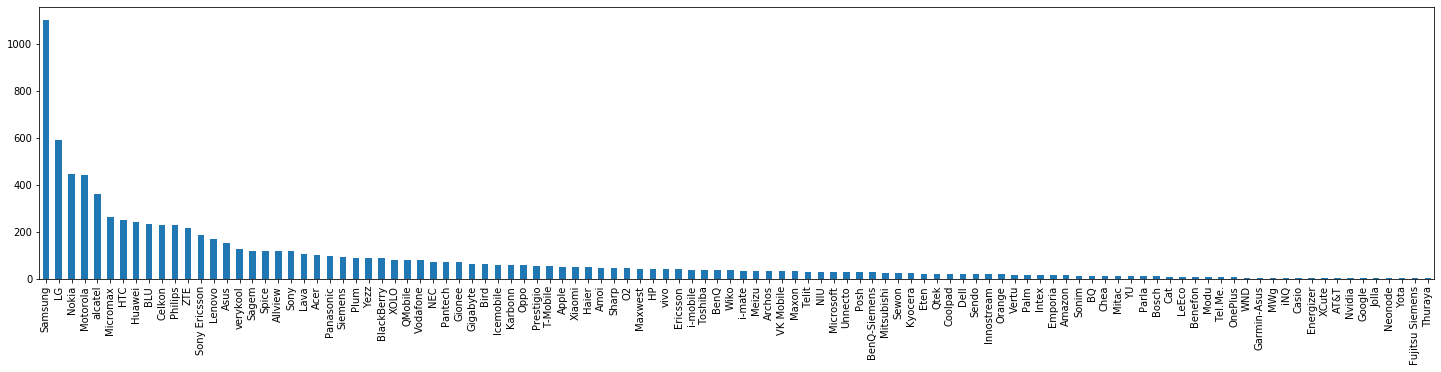

In [12]:
DF_brand.plot(kind='bar',figsize=(25,5));  

# There are 108 categories
# Samsung is the top brand
# Thuraya is the brand with least enteries

#### 2. Check distribution of 'approx_price_EUR' column. Check the presence of invalid values and impute it

In [13]:
DF_mobile['approx_price_EUR'].value_counts()    # Identifing unique elemnts in the 'approx_price_EUR' column

70       302
100      278
80       264
120      246
150      241
90       240
110      218
130      214
60       183
50       179
200      153
180      146
140      143
40       142
30       139
170      134
160      132
250      113
230      110
20       103
190      101
220      101
210       88
300       86
280       70
270       69
260       67
240       62
290       54
350       54
330       42
310       32
420       30
400       30
320       29
370       29
380       27
340       27
360       23
450       22
500       22
440       21
390       16
430       15
410       15
10        14
550       14
460       11
700       10
480        8
600        8
470        8
530        7
540        6
750        6
520        5
590        5
490        4
610        4
640        4
900        4
690        3
850        3
560        3
620        3
570        3
650        3
770        2
730        2
1000       2
9000       2
680        2
800        2
760        2
660        2
580        2
720        2

In [14]:
# We can see there is a entry 'Black' in the 'approx_price_EUR' column. 
# As 'approx_price_EUR' is a target column so we should drop this row rather than imputing the value.
DF_mobile[DF_mobile.approx_price_EUR == 'Black'] 

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
819,Asus,Google Nexus 7 (2013),GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - all versions,HSDPA 850 / 900 / 1700 / 1900 / 2100,LTE band 1(2100)/ 2(1900)/ 3(1800)/ 4(1700/210...,HSPA LTE,Yes,Yes,2013 July,Available. Released 2013 July,200 x 114 x 8.7 mm (7.87 x 4.49 x 0.34 in),290,Wi-Fi),NaN,Micro-SIM,LED-backlit IPS LCD capacitive touchscreen 16...,7.0 inches (~62.3% screen-to-body ratio),1200 x 1920 pixels (~323 ppi pixel density),Android 4.3 (Jelly Bean)/ upgradable to 6.0 (M...,Quad-core 1.5 GHz Krait,Qualcomm Snapdragon S4Pro,Adreno 320,No,16/32 GB,2 GB RAM,5 MP/ f/2.4/ autofocus,1.2 MP,Yes with stereo speakers,Yes,Wi-Fi 802.11 a/b/g/n/ dual-band,4.0/ A2DP/ LE,Yes with A-GPS,Yes,No,microUSB 2.0 (SlimPort),Accelerometer/ gyro/ proximity/ compass,Non-removable Li-Ion 3950 mAh battery,Black,http://cdn2.gsmarena.com/vv/bigpic/asus-google...


In [15]:
DF_mobile[DF_mobile["approx_price_EUR"].str.isdigit()==False]  # Another way of implemting the above logic

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,status,dimentions,weight_g,weight_oz,SIM,display_type,display_resolution,display_size,OS,CPU,Chipset,GPU,memory_card,internal_memory,RAM,primary_camera,secondary_camera,loud_speaker,audio_jack,WLAN,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
819,Asus,Google Nexus 7 (2013),GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - all versions,HSDPA 850 / 900 / 1700 / 1900 / 2100,LTE band 1(2100)/ 2(1900)/ 3(1800)/ 4(1700/210...,HSPA LTE,Yes,Yes,2013 July,Available. Released 2013 July,200 x 114 x 8.7 mm (7.87 x 4.49 x 0.34 in),290,Wi-Fi),NaN,Micro-SIM,LED-backlit IPS LCD capacitive touchscreen 16...,7.0 inches (~62.3% screen-to-body ratio),1200 x 1920 pixels (~323 ppi pixel density),Android 4.3 (Jelly Bean)/ upgradable to 6.0 (M...,Quad-core 1.5 GHz Krait,Qualcomm Snapdragon S4Pro,Adreno 320,No,16/32 GB,2 GB RAM,5 MP/ f/2.4/ autofocus,1.2 MP,Yes with stereo speakers,Yes,Wi-Fi 802.11 a/b/g/n/ dual-band,4.0/ A2DP/ LE,Yes with A-GPS,Yes,No,microUSB 2.0 (SlimPort),Accelerometer/ gyro/ proximity/ compass,Non-removable Li-Ion 3950 mAh battery,Black,http://cdn2.gsmarena.com/vv/bigpic/asus-google...


In [16]:
DF_mobile = DF_mobile[DF_mobile['approx_price_EUR'] != 'Black']   # Dropping the column where 'approx_price_EUR == Black'

In [17]:
DF_mobile.shape    # We can see 1 row is dropped

(8627, 40)

In [18]:
DF_mobile['approx_price_EUR'] = DF_mobile['approx_price_EUR'].astype('float64')  # Now changing the dtype = float64

In [19]:
DF_mobile['approx_price_EUR'].dtypes          # We can see the dtype has changed for 'approx_price_EUR' column

dtype('float64')

### 3. Data Cleansing

#### Select instances having brand as 'Samsung' and report the final shape of the dataset

#### Check for missing values and drop the columns having more than 30% os missing values. And impute the remaining columns with their mode value

In [20]:
DF_Samsung = DF_mobile[DF_mobile['brand'] == 'Samsung']   # Creating new DF_Samsung with dataset of only Samsung brand

In [21]:
DF_Samsung.shape                                          # Cheacking the shape of DF_Samsung

(1103, 40)

In [22]:
DF_Samsung.info()                                         # Checking not-null value for all attributes in DF_Samsung

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 5962 to 7064
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               1103 non-null   object 
 1   model               1103 non-null   object 
 2   network_technology  1103 non-null   object 
 3   2G_bands            1103 non-null   object 
 4   3G_bands            618 non-null    object 
 5   4G_bands            201 non-null    object 
 6   network_speed       621 non-null    object 
 7   GPRS                1101 non-null   object 
 8   EDGE                1101 non-null   object 
 9   announced           1103 non-null   object 
 10  status              1103 non-null   object 
 11  dimentions          1101 non-null   object 
 12  weight_g            1055 non-null   object 
 13  weight_oz           1055 non-null   object 
 14  SIM                 1103 non-null   object 
 15  display_type        1103 non-null   object 
 16  dis

In [23]:
# Checking columns which consist more than 30% of null values

cols_to_drop = DF_Samsung.columns[DF_Samsung.isnull().sum()/len(DF_Samsung) > 0.3] 
cols_to_drop

Index(['3G_bands', '4G_bands', 'network_speed', 'OS', 'CPU', 'Chipset', 'GPU',
       'RAM', 'NFC', 'sensors'],
      dtype='object')

In [24]:
# Drop the columns which consist more than 30% of null values and assigning it to new df_Samsung
df_Samsung = DF_Samsung.drop(cols_to_drop,axis=1)

#### Report the final shape of the dataset

In [25]:
df_Samsung.shape         # Now df_Samsung consists of 1103 rows and 30 attributes...i.e 10 columns have been dropped

(1103, 30)

In [26]:
df_Samsung.columns      # Columns in df_Samsung

Index(['brand', 'model', 'network_technology', '2G_bands', 'GPRS', 'EDGE',
       'announced', 'status', 'dimentions', 'weight_g', 'weight_oz', 'SIM',
       'display_type', 'display_resolution', 'display_size', 'memory_card',
       'internal_memory', 'primary_camera', 'secondary_camera', 'loud_speaker',
       'audio_jack', 'WLAN', 'bluetooth', 'GPS', 'radio', 'USB', 'battery',
       'colors', 'approx_price_EUR', 'img_url'],
      dtype='object')

In [27]:
df_Samsung.isnull().sum()    # Null values count in the remaining columns in df_Samsung

brand                   0
model                   0
network_technology      0
2G_bands                0
GPRS                    2
EDGE                    2
announced               0
status                  0
dimentions              2
weight_g               48
weight_oz              48
SIM                     0
display_type            0
display_resolution    133
display_size            0
memory_card             0
internal_memory       176
primary_camera        144
secondary_camera      146
loud_speaker            0
audio_jack              2
WLAN                    1
bluetooth               3
GPS                     0
radio                  14
USB                    85
battery                 0
colors                 49
approx_price_EUR      233
img_url                 0
dtype: int64

In [28]:
df_Samsung = df_Samsung[~df_Samsung['approx_price_EUR'].isnull()] # dropping rows where 'approx_price_EUR' = null 

In [29]:
# Another way :
#df_Samsung.dropna(subset = ['approx_price_EUR'], inplace=True)

In [30]:
df_Samsung.shape           # Now df_Samsung has 870 rows and 30 attributes

(870, 30)

In [31]:
df_Samsung['approx_price_EUR'].isnull().any()  # No numm values present in the 'approx_price_EUR' column

False

In [32]:
# Imputing the null values in the datafrmae with the mode()

for i in df_Samsung.columns:
    if df_Samsung[i].isnull().any():
        df_Samsung[i] = df_Samsung[i].fillna(df_Samsung[i].mode()[0])
        

In [33]:
df_Samsung.isnull().sum()     # Now we can see that all the null values in the dataset has been imputed with mode() value

brand                 0
model                 0
network_technology    0
2G_bands              0
GPRS                  0
EDGE                  0
announced             0
status                0
dimentions            0
weight_g              0
weight_oz             0
SIM                   0
display_type          0
display_resolution    0
display_size          0
memory_card           0
internal_memory       0
primary_camera        0
secondary_camera      0
loud_speaker          0
audio_jack            0
WLAN                  0
bluetooth             0
GPS                   0
radio                 0
USB                   0
battery               0
colors                0
approx_price_EUR      0
img_url               0
dtype: int64

In [34]:
df_Samsung.columns      # Columns present in the df_Samsung 

Index(['brand', 'model', 'network_technology', '2G_bands', 'GPRS', 'EDGE',
       'announced', 'status', 'dimentions', 'weight_g', 'weight_oz', 'SIM',
       'display_type', 'display_resolution', 'display_size', 'memory_card',
       'internal_memory', 'primary_camera', 'secondary_camera', 'loud_speaker',
       'audio_jack', 'WLAN', 'bluetooth', 'GPS', 'radio', 'USB', 'battery',
       'colors', 'approx_price_EUR', 'img_url'],
      dtype='object')

In [35]:
df_Samsung['model'].value_counts()   # We should drop this column as it consist of all unique values

I110 Illusion                      1
L310                               1
I9300I Galaxy S3 Neo               1
C450                               1
E1080T                             1
E1272                              1
L870                               1
A687 Strive                        1
Galaxy Note 8.0                    1
T369                               1
B5310 CorbyPRO                     1
X550                               1
SCH-W699                           1
S7330                              1
Galaxy J7                          1
Galaxy J1 Nxt                      1
E840                               1
Galaxy Note Pro 12.2               1
J800 Luxe                          1
Galaxy Pocket plus S5301           1
Wave Y S5380                       1
Galaxy Note T879                   1
Galaxy S5                          1
Galaxy A8 Duos                     1
I100 Gem                           1
A886 Forever                       1
A167                               1
i

In [36]:
df_Samsung['2G_bands'].value_counts()  # We cannot encode this column so we can delete this column

GSM 850 / 900 / 1800 / 1900                                          385
GSM 900 / 1800 / 1900                                                118
CDMA 800 / 1900                                                       72
GSM 900 / 1800                                                        60
GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2                           57
 NA                                                                   36
GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (dual-SIM model only)     34
GSM 850 / 900 / 1800 / 1900 - SIM 1                                   11
GSM 900 / 1800 - SIM 1 & SIM 2                                         9
GSM 850 / 900 / 1800 / 1900 - all versions                             9
GSM 850 / 1800 / 1900                                                  7
GSM 850 / 1900                                                         6
GSM 900 / 1800 / 1900 - SIM 1                                          6
GSM 900 / 1800 - SIM 1                             

In [37]:
df_Samsung['GPRS'].value_counts()   
# We can encode it as 0 and 1 as there are 133 datapoints with no GPRS which can be encoded as 1 
# and rest all can be encoded as 0 which means GPRS is present.

Yes                                   344
Class 10                              300
No                                    133
Class 12                               83
Class 33                                7
Class 12 (SIM 1)/ Class 10 (SIM 2)      1
Yes - SCH-I605/ SPH-L900                1
Class 8                                 1
Name: GPRS, dtype: int64

In [38]:
df_Samsung['GPS'].value_counts()
# We can encode it as 0 and 1 as there are 369 datapoints with no GPS which can be encoded as 1 
# and rest all can be encoded as 0 which means GPS is present.

No                                                369
Yes with A-GPS                                    203
Yes with A-GPS GLONASS                            166
Yes with A-GPS GLONASS BDS                         38
Yes                                                22
Yes with GLONASS                                   13
Yes with A-GPS GLONASS/ BDS (market dependant)      7
A-GPS only; AT&T Navigator                          7
Yes with A-GPS GLONASS/ BDS (region dependent)      6
Yes with A-GPS GLONASS BDS GALILEO                  4
Yes with A-GPS Samsung Mobile Navigator             4
A-GPS only; VZ Navigator                            3
A-GPS only; Google Maps                             3
Yes GLONASS BDS                                     2
Yes with A-GPS Bing map                             2
Yes with S-GPS; GLONASS                             2
Yes with A-GPS; MetroNavigator GPS                  2
Yes GLONASS                                         2
Yes; GLONASS                

In [39]:
df_Samsung['EDGE'].value_counts()
# We can encode it as 0 and 1 as there are 209 datapoints with no EDGE which can be encoded as 1 
# and rest all can be encoded as 0 which means EDGE is present.

Yes                                365
No                                 209
Class 10                           208
Class 12                            72
Class 33                             6
Class 11/ 236.8 kbps                 4
Class 6                              2
Yes - SCH-I605/ SPH-L900             1
Class 12 (SIM 1)                     1
Up to 384 kbps                       1
Class 10 (SIM 1/ download only)      1
Name: EDGE, dtype: int64

In [40]:
df_Samsung['USB'].value_counts()
# We can encode it as 0 and 1 as there are 43 datapoints with no USB which can be encoded as 1 
# and rest all can be encoded as 0 which means USB is present.

microUSB 2.0                                                393
2                                                           185
Yes                                                          67
No                                                           43
microUSB 2.0 (MHL TV-out)/ USB Host                          32
microUSB 2.0/ USB Host                                       23
1.1                                                          20
microUSB 2.0/ USB On-The-Go                                  19
microUSB                                                     10
microUSB 2.0 (MHL TV-out)                                     9
microUSB 2.0 (MHL 2 TV-out)/ USB Host                         9
microUSB 3.0 (MHL 2.1 TV-out)/ USB Host                       7
2.0/ USB Host                                                 6
2.0/ Type-C 1.0 reversible connector                          4
2.0 (TV-out)                                                  4
microUSB 2.0 (MHL 3 TV-out)/ USB Host   

In [41]:
df_Samsung['primary_camera'].value_counts()

2 MP                                                                                 187
5 MP/ autofocus/ LED flash                                                            84
1.3 MP                                                                                83
3.15 MP                                                                               75
VGA                                                                                   56
8 MP/ autofocus/ LED flash                                                            40
3.15 MP/ autofocus/ LED flash                                                         32
3.15 MP/ autofocus                                                                    25
3.15 MP/ LED flash                                                                    24
5 MP/ autofocus/ LED flash/                                                           20
5 MP/ autofocus                                                                       15
8 MP/ f/2.2/ autofocu

#### Let's select a few important columns for model building. We will encode 'network_technology', 'GPS', 'USB', 'primary_camera', 'display_resolution', 'internal_memory' and use 'approx_price_EUR' as target columns.

We will do the following encoding and check final frequency counts

In [42]:
# Creating DF_Final with the columns ['network_technology', 'GPS', 'USB', 'primary_camera', 'display_resolution', 'internal_memory']
DF_Final = df_Samsung[['network_technology', 'GPS', 'USB', 'primary_camera', 'display_resolution', 'internal_memory']]

In [43]:
Y = df_Samsung['approx_price_EUR']   # Target Column

In [44]:
DF_Final.shape    # DF_Final consists of 870 rows and 6 attributes

(870, 6)

#### Encode 'GPS', 'USB' column into two categories (whether GPS/USB is YES or NO)

In [45]:
DF_Final['GPS'].value_counts()
# We can encode it as 0 and 1 as there are 369 datapoints with no GPS which can be encoded as 1 
# and rest all can be encoded as 0 which means GPS is present.

No                                                369
Yes with A-GPS                                    203
Yes with A-GPS GLONASS                            166
Yes with A-GPS GLONASS BDS                         38
Yes                                                22
Yes with GLONASS                                   13
Yes with A-GPS GLONASS/ BDS (market dependant)      7
A-GPS only; AT&T Navigator                          7
Yes with A-GPS GLONASS/ BDS (region dependent)      6
Yes with A-GPS GLONASS BDS GALILEO                  4
Yes with A-GPS Samsung Mobile Navigator             4
A-GPS only; VZ Navigator                            3
A-GPS only; Google Maps                             3
Yes GLONASS BDS                                     2
Yes with A-GPS Bing map                             2
Yes with S-GPS; GLONASS                             2
Yes with A-GPS; MetroNavigator GPS                  2
Yes GLONASS                                         2
Yes; GLONASS                

In [46]:
DF_Final['GPS'].nunique()  # Unique enteries in GPS column

32

In [47]:
# Label encoding Logic for GPS column
for i in range(len(DF_Final['GPS'])):
    if DF_Final['GPS'].iloc[i] == 'No':
        DF_Final['GPS'].iloc[i] = 0
    else:
        DF_Final['GPS'].iloc[i] = 1

In [48]:
DF_Final['GPS'].value_counts() 

1    501
0    369
Name: GPS, dtype: int64

In [49]:
DF_Final['USB'].value_counts()
# We can encode it as 0 and 1 as there are 43 datapoints with no USB which can be encoded as 1 
# and rest all can be encoded as 0 which means usb is present.

microUSB 2.0                                                393
2                                                           185
Yes                                                          67
No                                                           43
microUSB 2.0 (MHL TV-out)/ USB Host                          32
microUSB 2.0/ USB Host                                       23
1.1                                                          20
microUSB 2.0/ USB On-The-Go                                  19
microUSB                                                     10
microUSB 2.0 (MHL TV-out)                                     9
microUSB 2.0 (MHL 2 TV-out)/ USB Host                         9
microUSB 3.0 (MHL 2.1 TV-out)/ USB Host                       7
2.0/ USB Host                                                 6
2.0/ Type-C 1.0 reversible connector                          4
2.0 (TV-out)                                                  4
microUSB 2.0 (MHL 3 TV-out)/ USB Host   

In [50]:
DF_Final['USB'].nunique()  # Unique enteries for USB column

39

In [51]:
# Label encoding for USB column
for i in range(len(DF_Final['USB'])):
    if DF_Final['USB'].iloc[i] == 'No':
        DF_Final['USB'].iloc[i] = 0
    else:
        DF_Final['USB'].iloc[i] = 1

In [52]:
DF_Final['USB'].value_counts()  

1    827
0     43
Name: USB, dtype: int64

#### Encode "network_technology". Create two categories one having value as "No cellular connectivity " and another having all otrher types of connectivity

In [53]:
df_Samsung['network_technology'].value_counts() 
# There are 36 cellular phone with 'No cellular Connectivity' in df_Samsung

GSM / HSPA                        277
GSM                               265
GSM / HSPA / LTE                  155
CDMA / EVDO                        43
No cellular connectivity           36
GSM / UMTS                         28
GSM / CDMA / HSPA / EVDO / LTE     16
CDMA / EVDO / LTE                  15
CDMA / CDMA2000                    10
CDMA                                8
GSM / CDMA / EVDO                   4
GSM / CDMA / HSPA / LTE             3
GSM / CDMA                          3
HSPA / LTE                          2
CDMA / HSPA / EVDO                  1
GSM / CDMA / UMTS / EVDO            1
CDMA / HSPA / EVDO / LTE            1
HSPA                                1
GSM / UMTS / HSPA / LTE             1
Name: network_technology, dtype: int64

In [54]:
DF_Final['network_technology'].nunique()  # Unique elements in the network_technologies column

19

In [55]:
# Label encoding for network_technologies column
for i in range(len(DF_Final['network_technology'])):
    if DF_Final['network_technology'].iloc[i] == 'No cellular connectivity':
        DF_Final['network_technology'].iloc[i] = 0
    else:
        DF_Final['network_technology'].iloc[i] = 1

In [56]:
DF_Final['network_technology'].value_counts()

1    834
0     36
Name: network_technology, dtype: int64


### A RegEx, or Regular Expression , is a sequence of characters that forms a seacrh pattern.

RegEx can be used to check if a string contains the specified pattern.

- findall : Retuns a list containing all matches
- search : Returns a match object if there is a match in the string
- split : Returns a list where the string has been split at each match
- sub : Replaces one or many matches with a string


Returns a match where the string contains digit(numbers 0-9) "/d"

In [57]:
text = '2...2 inches (~27.111% screen-to-body ratio) 25'
import re
re.findall("\d+\.\d", text)


['27.1']

In [58]:
text = '2...2 inches (~27.111% screen-to-body ratio) 25'
import re
re.findall("\d+\.?\d*", text)

['2.', '2', '27.111', '25']

In [59]:
text = '2...2 inches (~27.111% screen-to-body ratio) 25'
import re
re.findall("\d+\.*\d*", text)

['2...2', '27.111', '25']

#### Encode "display_resolution". Find the resolution number using regex

In [60]:
X = DF_Final.copy()   # Creating new data frame X as the copy of DF_Final dataset

In [61]:
# Regular expression for extracting the numbers from each enteries in the display_resolution column and replacing it in the same column
import re
for i in range(len(X['display_resolution'])):
    txt=X['display_resolution'].iloc[i]
    x = re.findall("\d+\.*\d*", txt)
    X['display_resolution'].iloc[i]=x[0]

In [62]:
X['display_resolution'].head()  # Displaying top 5 rows of display_resolution column

5962    5.7
5963    5.5
5964    5.5
5965    5.2
5966    5.0
Name: display_resolution, dtype: object

In [63]:
# Converting the datatype of the display_resolution column to float64
X['display_resolution'] = X['display_resolution'].astype('float64')  

In [64]:
X.dtypes  # Checking the datatype has been changed from object to float64 for display_resolution column

network_technology     object
GPS                    object
USB                    object
primary_camera         object
display_resolution    float64
internal_memory        object
dtype: object

#### Encode "internal_memory". Create two categories having values in MB, or GB using regex

### Hint - 
mb = re.search('MB',txt)
    if mb:
        X['internal_memory'].iloc[i]=1
    else:
        X['internal_memory'].iloc[i]=0

In [65]:
X['internal_memory'].head()      # Selecting top 5 rows of the internal_memory column 

5962    32 GB
5963    64 GB
5964    16 GB
5965    16 GB
5966    16 GB
Name: internal_memory, dtype: object

In [66]:
# Label encoding for internal_memory column 
import re
for i in range(len(X['internal_memory'])):
    txt=X['internal_memory'].iloc[i]
    x = re.search('GB',txt)
    if x:
        X['internal_memory'].iloc[i]=1
    else:
        X['internal_memory'].iloc[i]=0

In [67]:
X['internal_memory'].value_counts()

1    477
0    393
Name: internal_memory, dtype: int64

#### Encode "primary_camera". Create 2-3 categories having no camera, camera in M, or VGA using regex


In [68]:
X['primary_camera'].nunique()      # Checking counts of unique elements in the primary_camera column

104

In [69]:
# Label encoding for primary_camera column
import re
for i in range(len(X['primary_camera'])):
    txt=X['primary_camera'].iloc[i]
    type1 = re.search('VGA',txt) 
    type2 = re.search('MP',txt) 
    if type1: 
        X['primary_camera'].iloc[i]=0
    elif type2:
        X['primary_camera'].iloc[i]=1
    else :
        X['primary_camera'].iloc[i]=2

In [70]:
X['primary_camera'].value_counts()

1    811
0     59
Name: primary_camera, dtype: int64

### 4. Data Preparation

Segregate X and y

In [71]:
X.head()    # Checking data in X data set

,network_technology,GPS,USB,primary_camera,display_resolution,internal_memory
5962,1,1,1,1,5.7,1
5963,1,1,1,1,5.5,1
5964,1,1,1,1,5.5,1
5965,1,1,1,1,5.2,1
5966,1,1,1,1,5.0,1


In [72]:
y = Y      # Creating target dataset

In [73]:
X.count()

network_technology    870
GPS                   870
USB                   870
primary_camera        870
display_resolution    870
internal_memory       870
dtype: int64

In [74]:
y.count()

870

### 5. EDA

#### Perform univariate analysis by checking frequency distribution of all the features

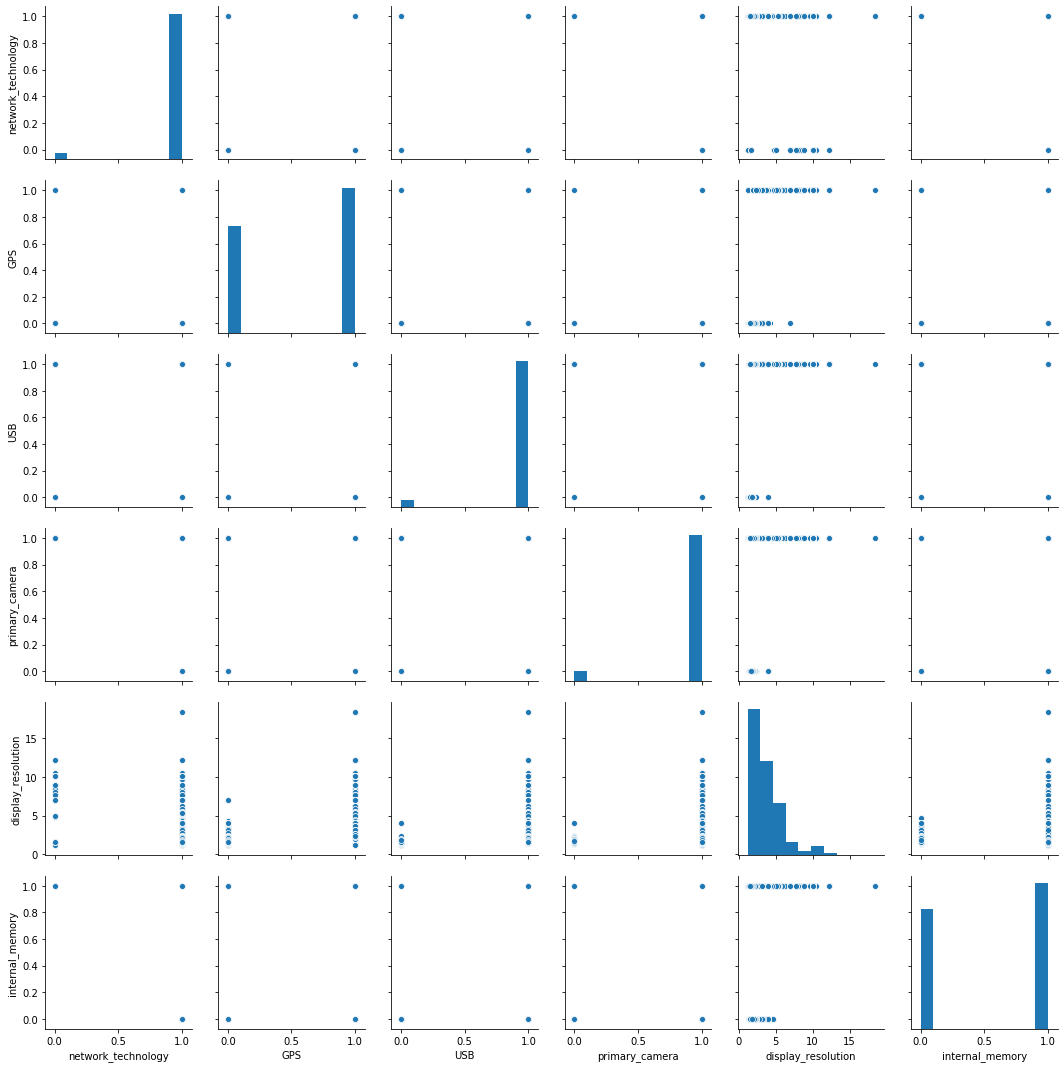

In [75]:
sns.pairplot(X);   

#### Perform bivariate analysis by checking doing crosstab between independent and dependent features

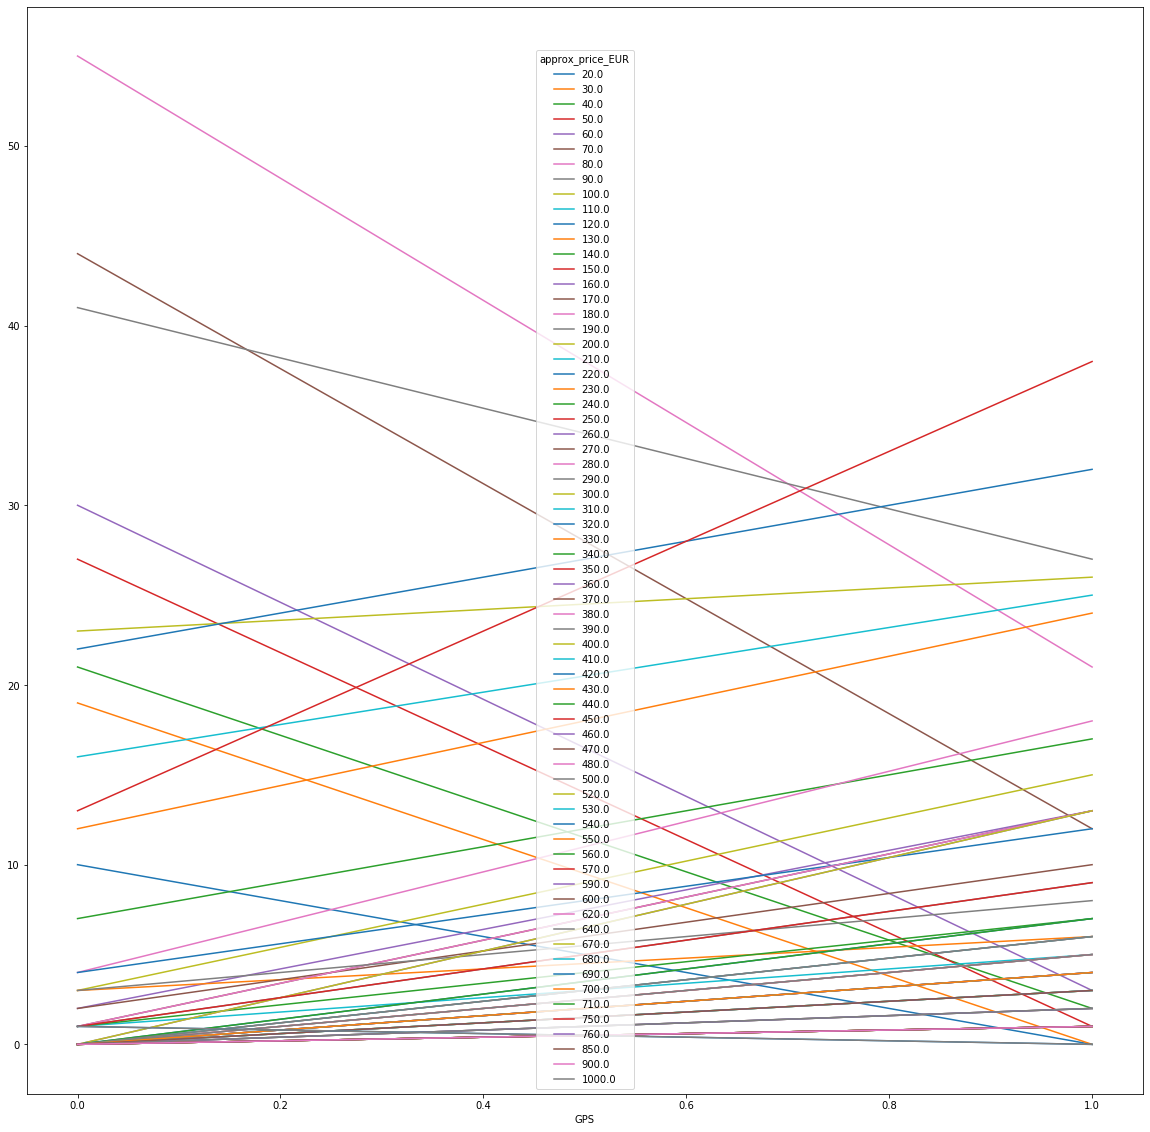

In [76]:
pd.crosstab(X['GPS'],y).plot(figsize=(20,20));

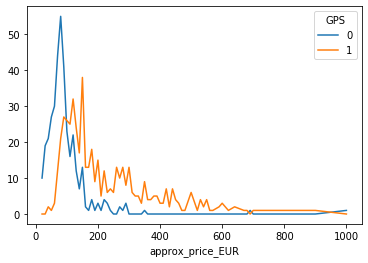

In [77]:
pd.crosstab(y,X['GPS']).plot();

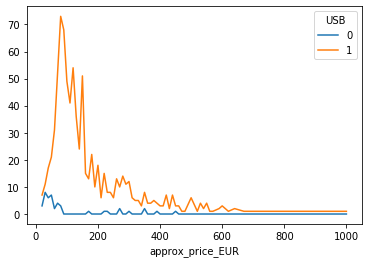

In [78]:
pd.crosstab(y,X['USB']).plot();

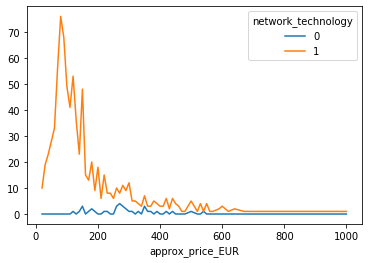

In [79]:
pd.crosstab(y,X['network_technology']).plot();

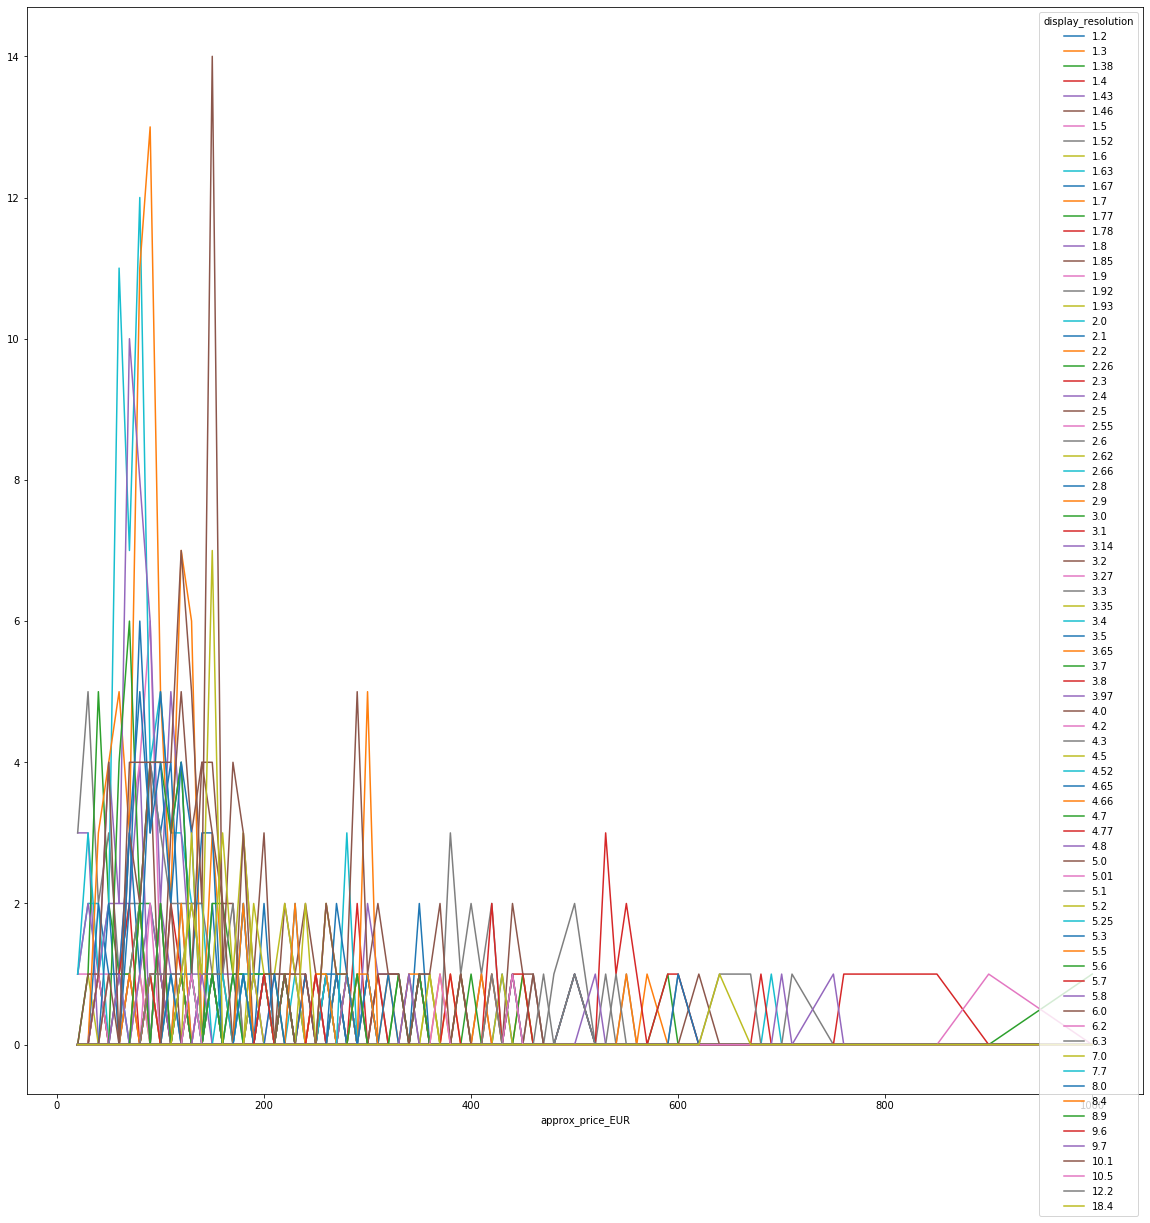

In [80]:
pd.crosstab(y,X['display_resolution']).plot(figsize=(20,20));

### 6. Split data into Train and Test set and build a Supervised Learning model using Linear Regression

In [81]:
# Splitting data into the train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state = 10)

In [82]:
model = LinearRegression()             # Instantiating LinearRegression Model
model.fit(X_train,y_train)             # Training the model
model.score(X_train,y_train)           # Checking score for training set

0.44424370023331466

In [83]:
model.score(X_test,y_test)             # Checking score for testing set

0.42696259633797445

### 7. Train a KNN model and check its performance

In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8)      # Instantiating KNN Regressor model

In [85]:
knn.fit(X_train,y_train)                      # Training the model
knn.score(X_train,y_train)                    # Checking score for training set

0.6773331246666998

In [86]:
knn.score(X_test,y_test)                      # Checking score for testing set

0.7216126886421854

                                     End of case study